Paul Sentongo
Ogwok Kenneth
Marvin 
Comfort Agaba

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

Import our data set.

In [83]:
# Load data
r3 = pd.read_csv(r'C:\Users\KENNY PC\OneDrive\Desktop\Ai project\Unsupervised learning models\unsupervised-learning\Social_Media_Post.csv')

In [3]:
r3.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
r3.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

Exploring our data for missing values.

In [6]:
r3.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
r3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Dealing with Missing values: we shall drop the columns because they have 7050 missing values which are equal to the number of entries.

In [84]:
# Drop columns with high missing values
r3_cleaned = r3.drop(columns=['status_id','Column1','Column2','Column3','Column4'])

In [85]:
r3_cleaned.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


we have removed status ID, column 1, 2, 3 and 4 from our data set.

In [86]:
r3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 606.0+ KB


In [87]:
r3_cleaned.columns

Index(['status_type', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'],
      dtype='object')

Exploring data to find duplicates, we have 54 duplicates

In [88]:
r3_cleaned.shape

(7050, 11)

In [89]:
r3_cleaned.duplicated().sum()

54

In [90]:
# Convert 'status_published' to datetime
r3_cleaned['status_published'] = pd.to_datetime(r3_cleaned['status_published'])

##checking for outliers

<Axes: >

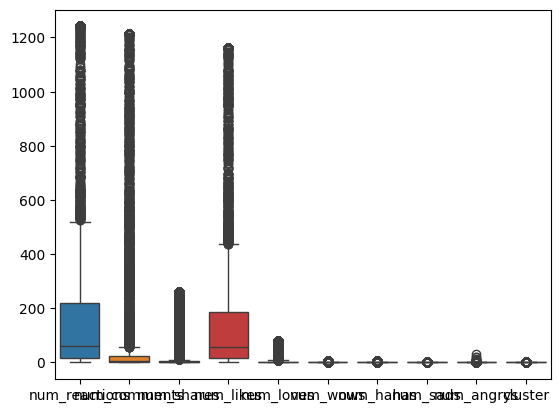

In [102]:
sns.boxplot(r3_cleaned)

# Handling outliers with winsorization

In [91]:

continuous_vars = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads']
Q1 = r3_cleaned[continuous_vars].quantile(0.25)
Q3 = r3_cleaned[continuous_vars].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((r3_cleaned[continuous_vars] < (Q1 - 1.5 * IQR)) | (r3_cleaned[continuous_vars] > (Q3 + 1.5 * IQR))).any(axis=1)
r3_cleaned[continuous_vars] = r3_cleaned[continuous_vars].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))


# Normalize data

In [92]:

scaler = StandardScaler()
r3_scaled = scaler.fit_transform(r3_cleaned[continuous_vars])

# Determine optimal number of clusters using elbow method

In [93]:

inertia = []
k_range = range(1, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(r3_scaled)
    inertia.append(kmeans.inertia_)


# Plot elbow curve

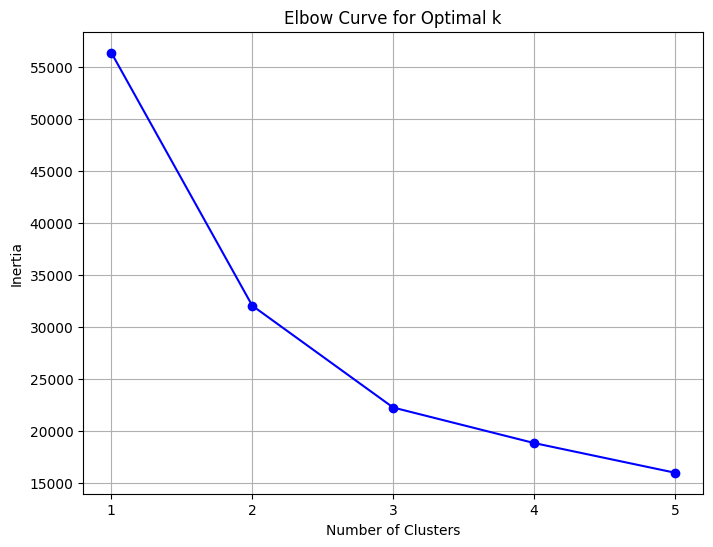

In [94]:
# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Perform clustering with optimal k

In [95]:

optimal_k = 3  # Adjust based on elbow curve analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(r3_scaled)

KMeans(n_clusters=3, random_state=42)

# Assign cluster labels

In [96]:

cluster_labels = kmeans.labels_
r3_cleaned['cluster'] = cluster_labels

# Visualize clusters

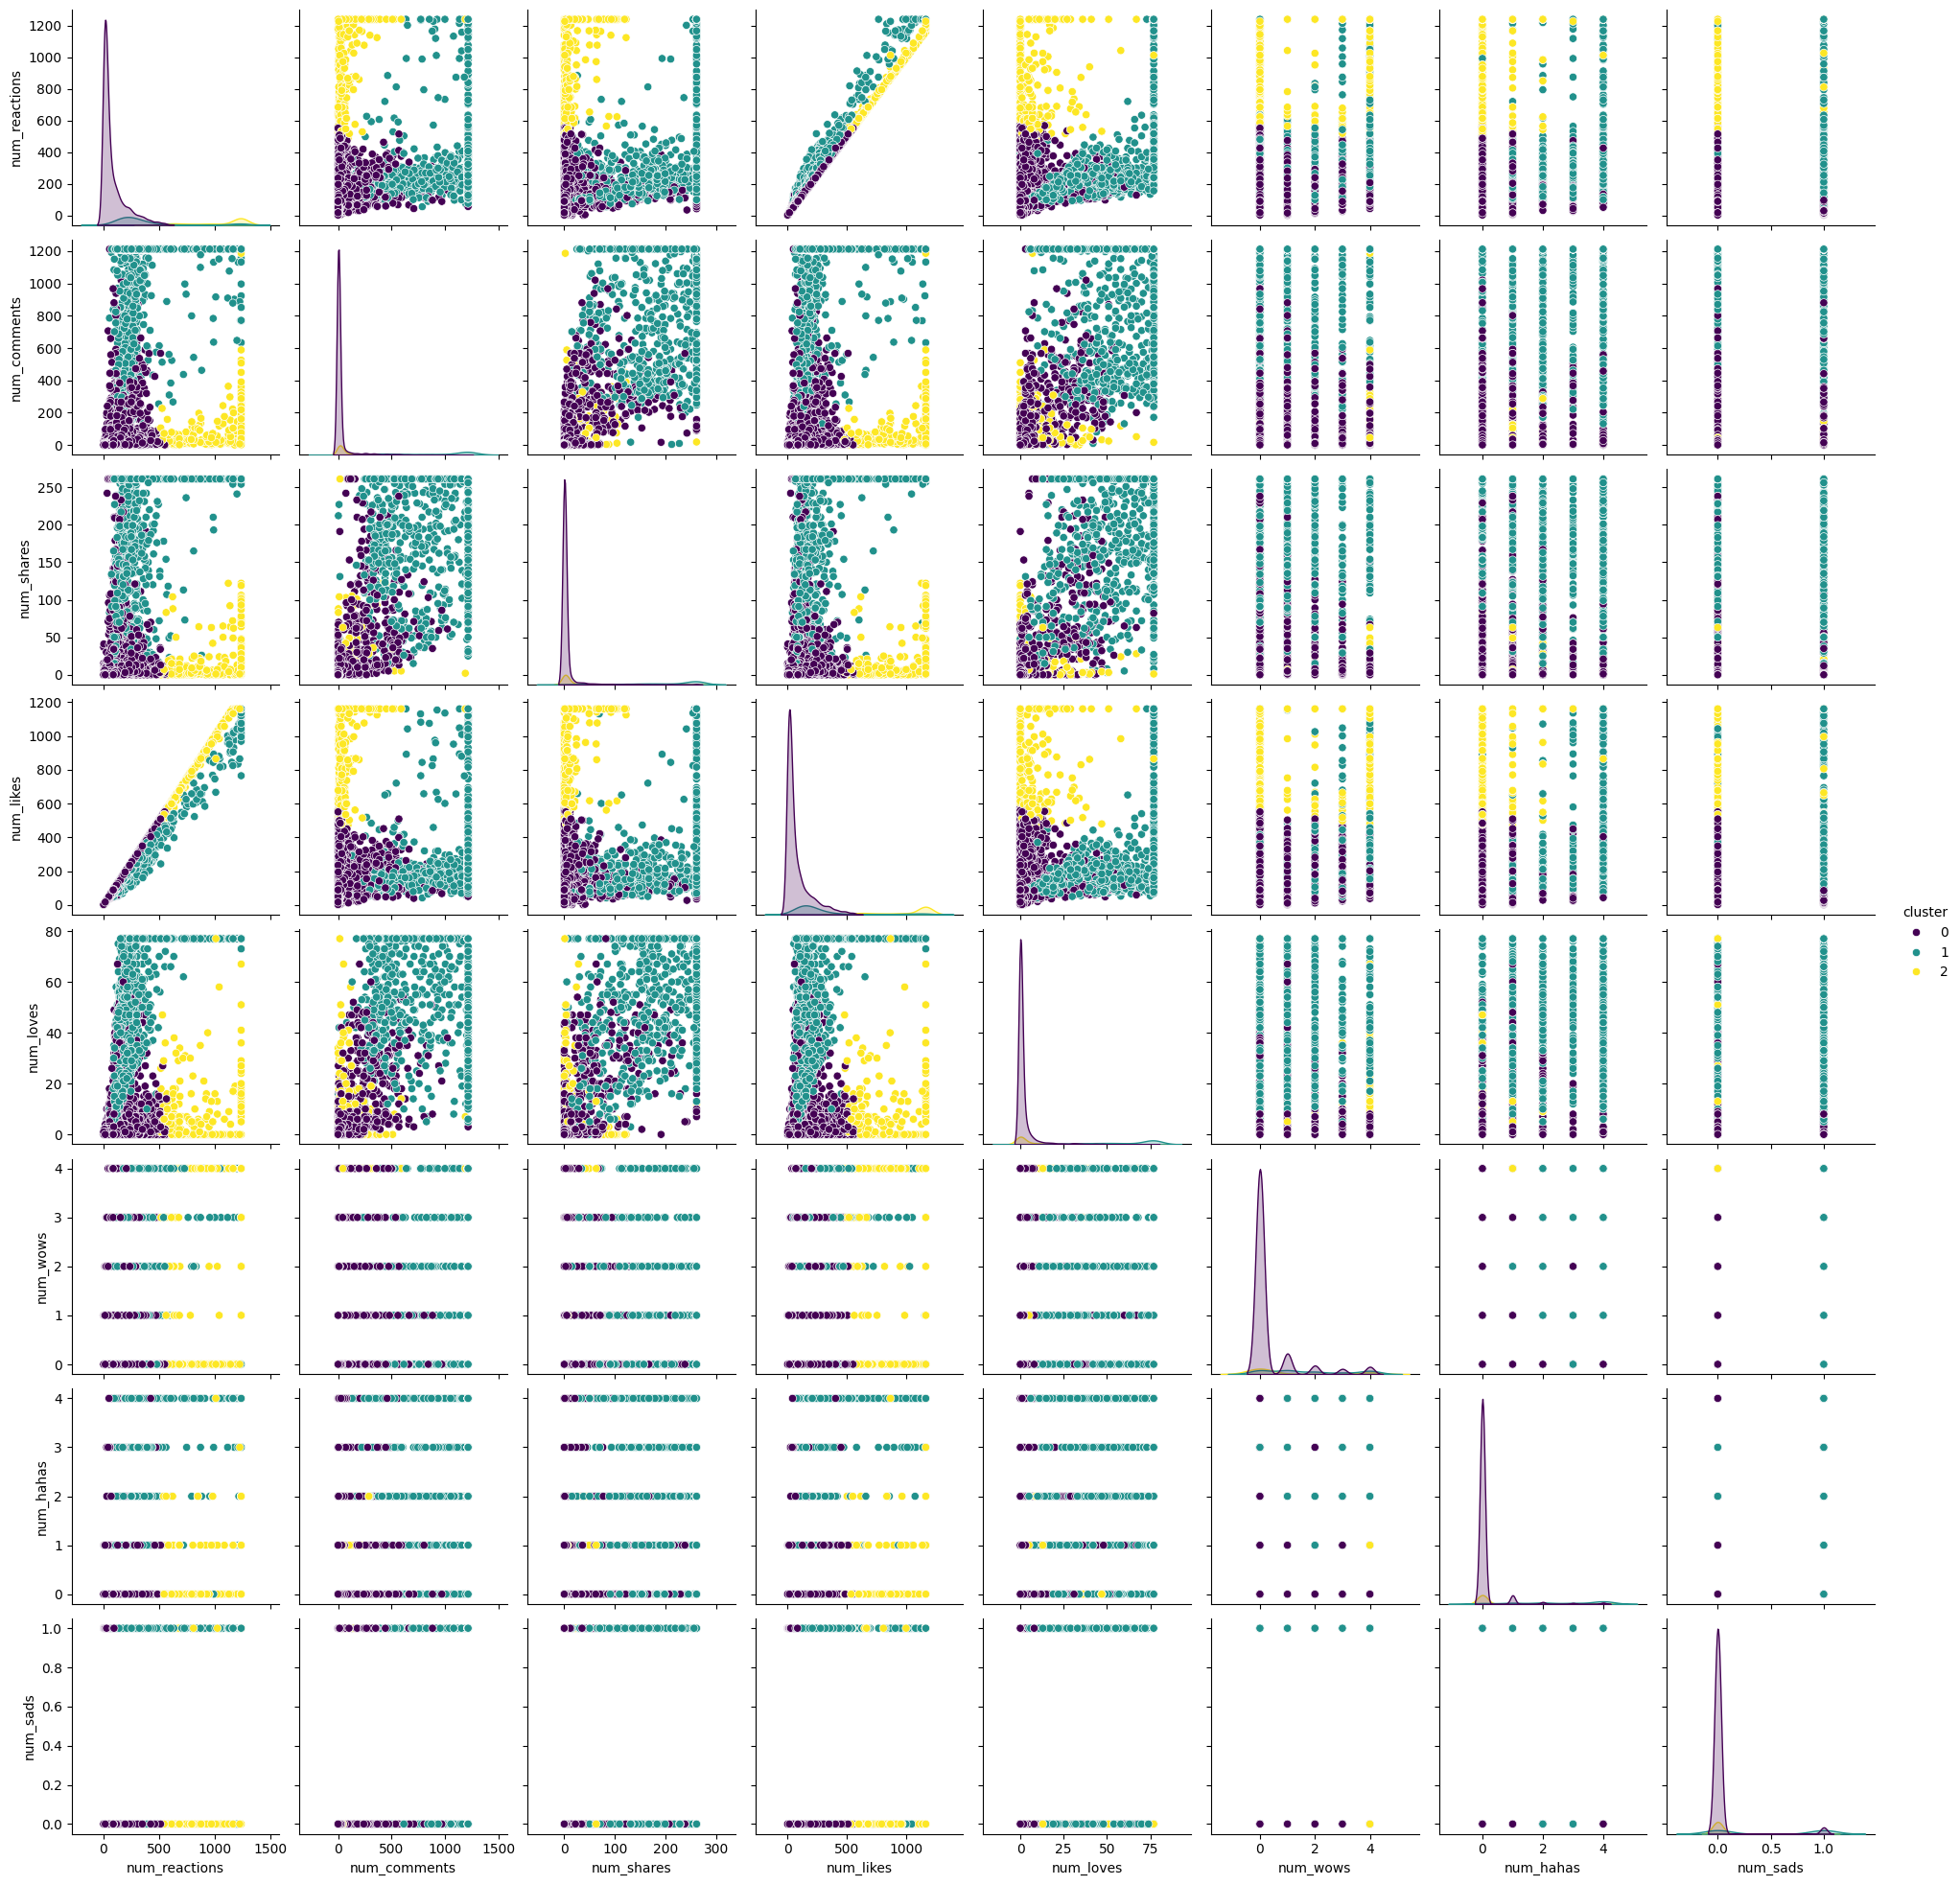

In [97]:

sns.pairplot(r3_cleaned, vars=continuous_vars, hue='cluster', palette='viridis')
plt.show()

# Analyze and interpret results based on cluster characteristics

In [98]:

print(r3_cleaned[['status_type', 'status_published', 'cluster']])

     status_type    status_published  cluster
0          video 2018-04-22 06:00:00        1
1          photo 2018-04-21 22:45:00        0
2          video 2018-04-21 06:17:00        0
3          photo 2018-04-21 02:29:00        0
4          photo 2018-04-18 03:22:00        0
...          ...                 ...      ...
7045       photo 2016-09-24 02:58:00        0
7046       photo 2016-09-23 11:19:00        0
7047       photo 2016-09-21 23:03:00        0
7048       photo 2016-09-20 00:43:00        0
7049       photo 2016-09-10 10:30:00        0

[7050 rows x 3 columns]


In [101]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats.mstats import winsorize
# Perform clustering with optimal k
optimal_k = 3  # Adjust based on elbow curve analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(r3_scaled)

# Assign cluster labels
cluster_labels = kmeans.labels_
r3_cleaned['cluster'] = cluster_labels

# Calculate silhouette score
silhouette_avg = silhouette_score(r3_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(r3_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {db_index}")

from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(r3_scaled, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index}")


Silhouette Score: 0.6673902927951163
Davies-Bouldin Index: 0.8030402594132703
Calinski-Harabasz Index: 5417.792987261497


The combination of these metrics suggests that your clustering algorithm has produced meaningful and well-separated clusters in your data. The Silhouette Score and Davies-Bouldin Index both indicate good clustering quality, with distinct clusters and minimal overlap. The high Calinski-Harabasz Index further reinforces that the clusters are tightly grouped and separated from each other. These results collectively indicate that your clustering approach has effectively segmented your data into meaningful groups based on the chosen number of clusters